In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for forming table to visualize results
from tabulate import tabulate
from sklearn.model_selection import train_test_split 



# Data Loading and Overviewing

In [55]:
#Reading the dataset csv file
df = pd.read_csv("Sleep_Efficiency.csv")
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06-03-21 1:00,06-03-21 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-21 2:00,05-12-21 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25-05-21 21:30,25-05-21 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03-11-21 2:30,03-11-21 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13-03-21 1:00,13-03-21 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,13-11-21 22:00,13-11-21 5:30,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,31-03-21 21:00,31-03-21 3:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,07-09-21 23:00,07-09-21 7:30,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,29-07-21 21:00,29-07-21 4:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [57]:
print(f'The dateset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dateset has 452 rows and 15 columns.


In [58]:
print('Columns of dataset\n__________________________________________________________________________________________________')
# Print the columns of the dataset
print('Sleep Efficiency Dataset:', df.columns)

Columns of dataset
__________________________________________________________________________________________________
Sleep Efficiency Dataset: Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


In [59]:
# Drop the 'ID' column
df = df.drop(['ID','Bedtime','Wakeup time'], axis=1)

# Move the "Sleep efficiency" column to the end of the dataframe
df = df[[c for c in df if c not in ['Sleep efficiency']] + ['Sleep efficiency']]

In [60]:
# Print unique values in each column of the dataset
for col in df.columns:
    print("Unique values in column '{}' are:".format(col))
    print(df[col].unique())

Unique values in column 'Age' are:
[65 69 40 57 36 27 53 41 11 50 55 30 28 32 21 43 52 24 29 63 35 23 47 18
 26 37 46 61 38 20 58 31 34  9 16 54 56 25 44 66 48 45 39 51 22 15 19 33
 42 68 14 49 62 64 59 10 13 60 67 17 12]
Unique values in column 'Gender' are:
['Female' 'Male']
Unique values in column 'Sleep duration' are:
[ 6.   7.   8.   7.5 10.   9.   8.5  5.   5.5]
Unique values in column 'REM sleep percentage' are:
[18 19 20 23 27 28 24 25 15 22 26 30 21]
Unique values in column 'Deep sleep percentage' are:
[70 28 25 55 60 52 37 57 58 32 22 20 67 75 65 72 30 23 53 56 63 59 35 62
 51 24 27 18 40]
Unique values in column 'Light sleep percentage' are:
[12 53 10 52 18 17 47 20 45 22 48 50 62 13 19 16 54 15 55 21 46 56 51 14
 30 40  7 63 11]
Unique values in column 'Awakenings' are:
[ 0.  3.  1.  2.  4. nan]
Unique values in column 'Caffeine consumption' are:
[  0.  50.  nan  25.  75. 200. 100.]
Unique values in column 'Alcohol consumption' are:
[ 0.  3.  5.  1.  2. nan  4.]
Unique valu

# Data Cleaning

In [61]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
Age                        0
Gender                     0
Sleep duration             0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
Sleep efficiency           0
dtype: int64
________________________________________
Number of records in total: 452
Number of records that has NaN values: 64


In [62]:
# Perform mode imputation for the missing values in dataset
columns_to_impute = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

for column in columns_to_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [63]:
# Recheck for missing values
print("Check for missing values after mode imputation.\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing values after mode imputation.
________________________________________
Age                       0
Gender                    0
Sleep duration            0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Sleep efficiency          0
dtype: int64
________________________________________
Number of records in total: 452
Number of records that has NaN values: 0


In [64]:
print('There are {} duplicate values.'.format(df.duplicated().sum()))

There are 0 duplicate values.


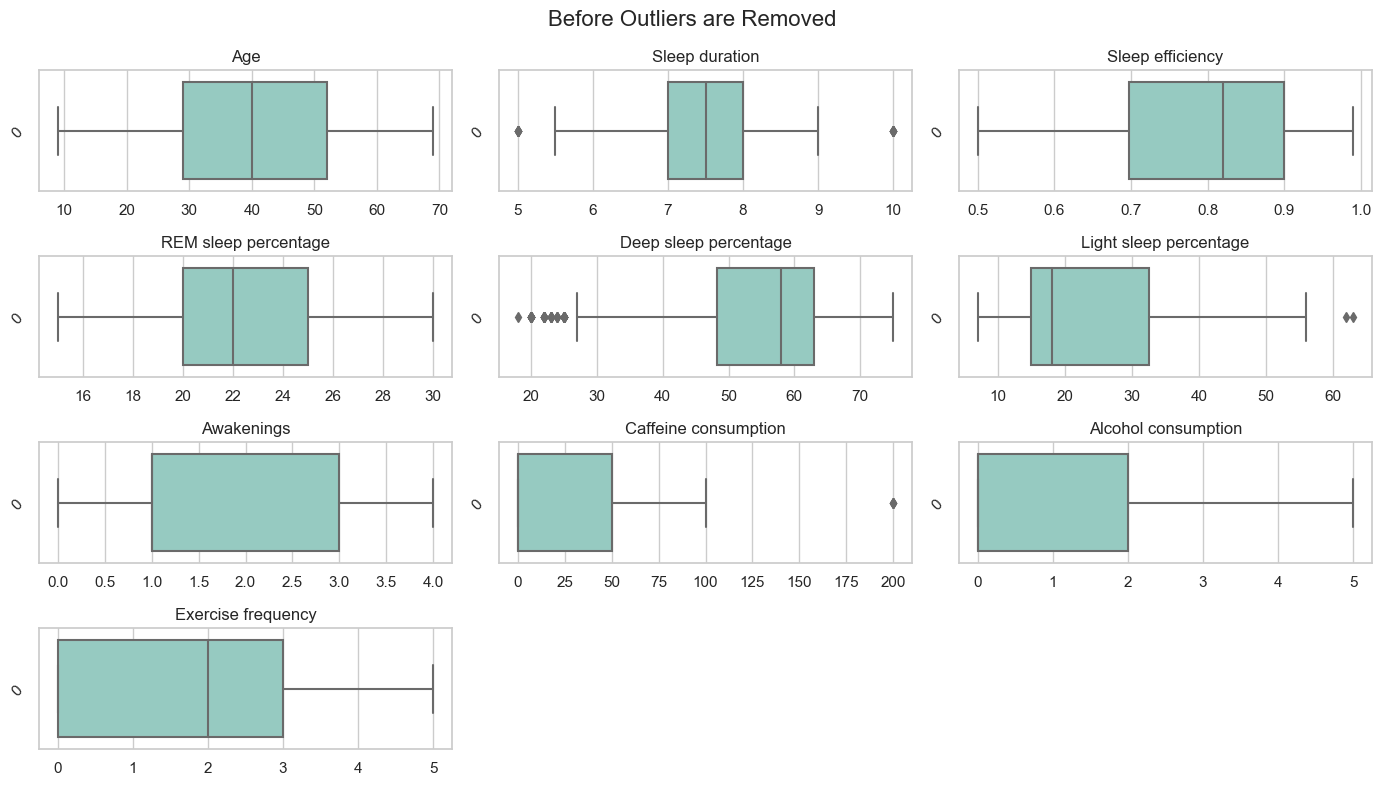

In [65]:
#Create a figures of boxplots for the numerical features to visualize the distribution and variability of each feature in order to identify the outliers in each feature.

sns.set_palette("Set3")
fig, axs = plt.subplots(4, 3, figsize=(14, 8))

numerical_features = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
                      'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                      'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(df[feature], orient='h', ax=axs[row, col]).set(title=feature)
    axs[row, col].tick_params(axis='y', rotation=45)  # Rotate y-axis labels for better readability

fig.delaxes(axs[3, 1])
fig.delaxes(axs[3, 2])
plt.suptitle("Before Outliers are Removed", fontsize=16)
plt.tight_layout()
plt.show()

In [66]:
# Apply Winsorization to remove outliers
def winsorize(column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = column.quantile(lower_quantile)
    upper_bound = column.quantile(upper_quantile)
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

# Winsorize each column with outliers
columns_with_outliers = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 
                         'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 
                         'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in columns_with_outliers:
    df[column] = winsorize(df[column])

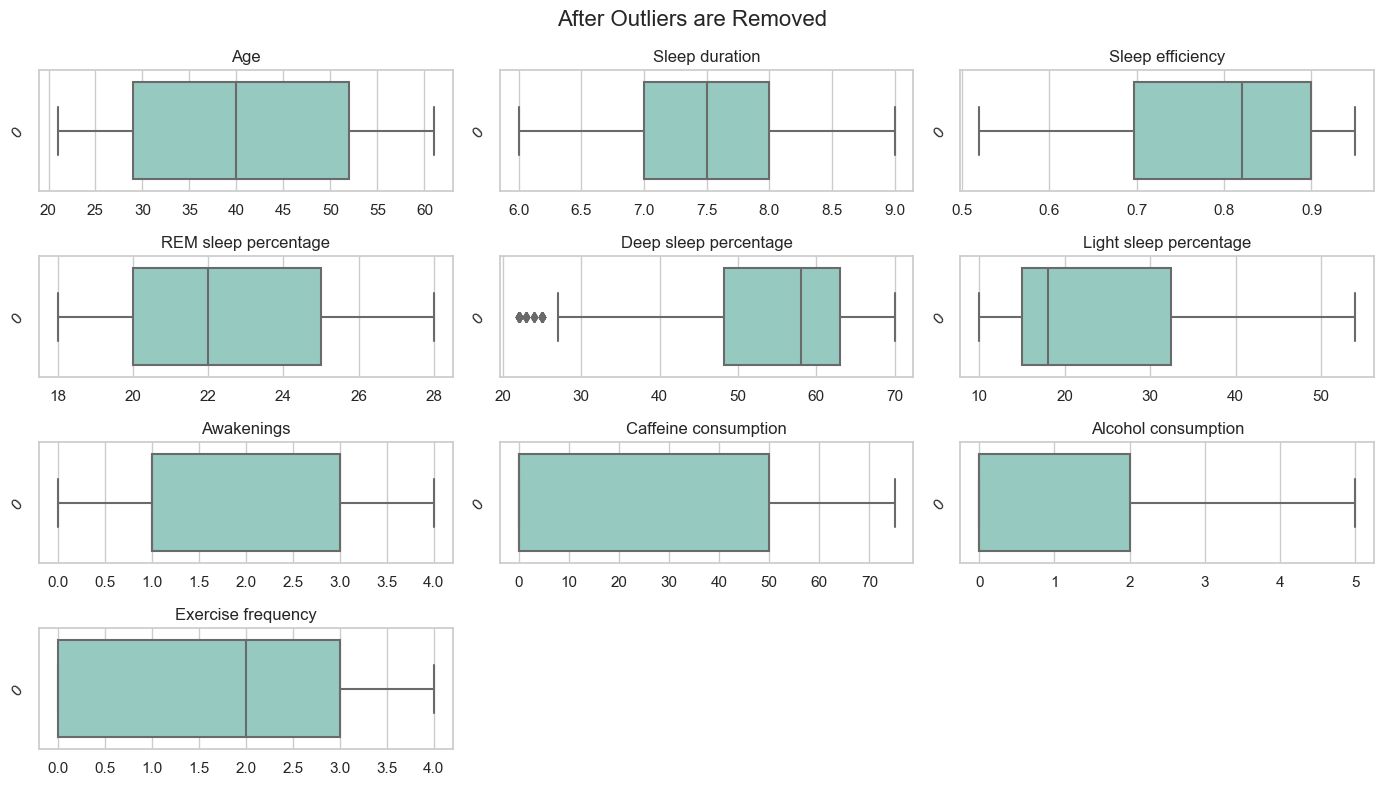

In [67]:
#Creating a figure of boxplots for the numerical features, visualising the distribution and variability of each feature after the outliers have been removed

sns.set_palette("Set3")
fig, axs = plt.subplots(4, 3, figsize=(14, 8))

numerical_features = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
                      'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                      'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(df[feature], orient='h', ax=axs[row, col]).set(title=feature)
    axs[row, col].tick_params(axis='y', rotation=45)  # Rotate y-axis labels for better readability

fig.delaxes(axs[3, 1])
fig.delaxes(axs[3, 2])
plt.suptitle("After Outliers are Removed", fontsize=16)
plt.tight_layout()
plt.show()

In [68]:
# Check skewness of data
skewness = df[numerical_features].skew()

for feature, skew in skewness.items():
    print(f"Skewness of {feature}: {skew}")

Skewness of Age: 0.06380250111523021
Skewness of Sleep duration: 0.046083740439208376
Skewness of Sleep efficiency: -0.646036871776274
Skewness of REM sleep percentage: 0.2503810006180442
Skewness of Deep sleep percentage: -0.9779277204550598
Skewness of Light sleep percentage: 1.0667263020658064
Skewness of Awakenings: 0.5547934662057271
Skewness of Caffeine consumption: 0.7088299473234972
Skewness of Alcohol consumption: 1.1873077494667155
Skewness of Exercise frequency: 0.04768982920224636


# Exploratory Data Analysis

In [69]:
# Summary Statistics
df.describe()

,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sleep efficiency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.311947,7.469027,22.676991,52.831858,24.502212,1.612832,21.183628,1.137168,1.789823,0.788894
std,12.472321,0.773116,3.300487,15.373922,15.125711,1.332891,25.040621,1.608938,1.391320,0.133422
min,21.000000,6.000000,18.000000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.520000
25%,29.000000,7.000000,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.697500
50%,40.000000,7.500000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000,0.820000
75%,52.000000,8.000000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000,0.900000
max,61.000000,9.000000,28.000000,70.000000,54.000000,4.000000,75.000000,5.000000,4.000000,0.950000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep duration'}>,
        <Axes: title={'center': 'REM sleep percentage'}>],
       [<Axes: title={'center': 'Deep sleep percentage'}>,
        <Axes: title={'center': 'Light sleep percentage'}>,
        <Axes: title={'center': 'Awakenings'}>],
       [<Axes: title={'center': 'Caffeine consumption'}>,
        <Axes: title={'center': 'Alcohol consumption'}>,
        <Axes: title={'center': 'Exercise frequency'}>],
       [<Axes: title={'center': 'Sleep efficiency'}>, <Axes: >, <Axes: >]],
      dtype=object)

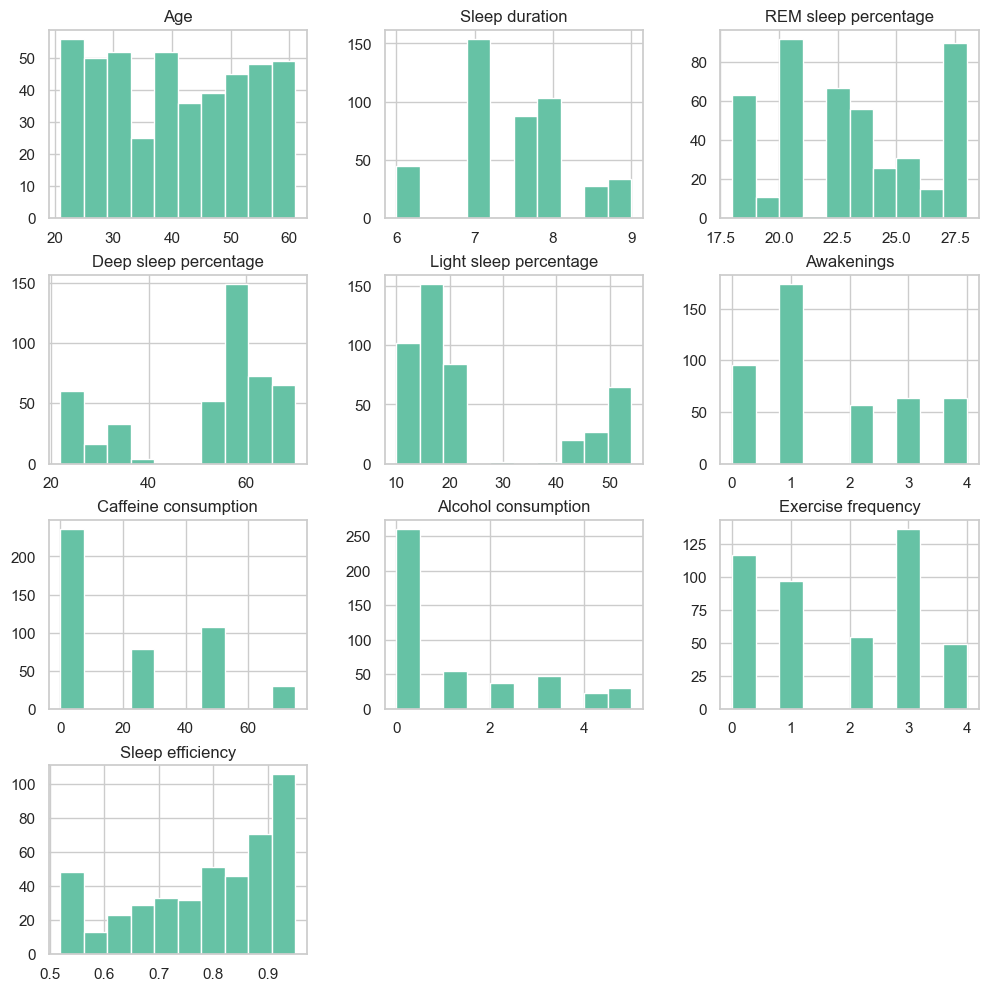

In [70]:
# Show the distribution of numerical features
sns.set_palette("Set2")
df.hist(figsize=(12,12))

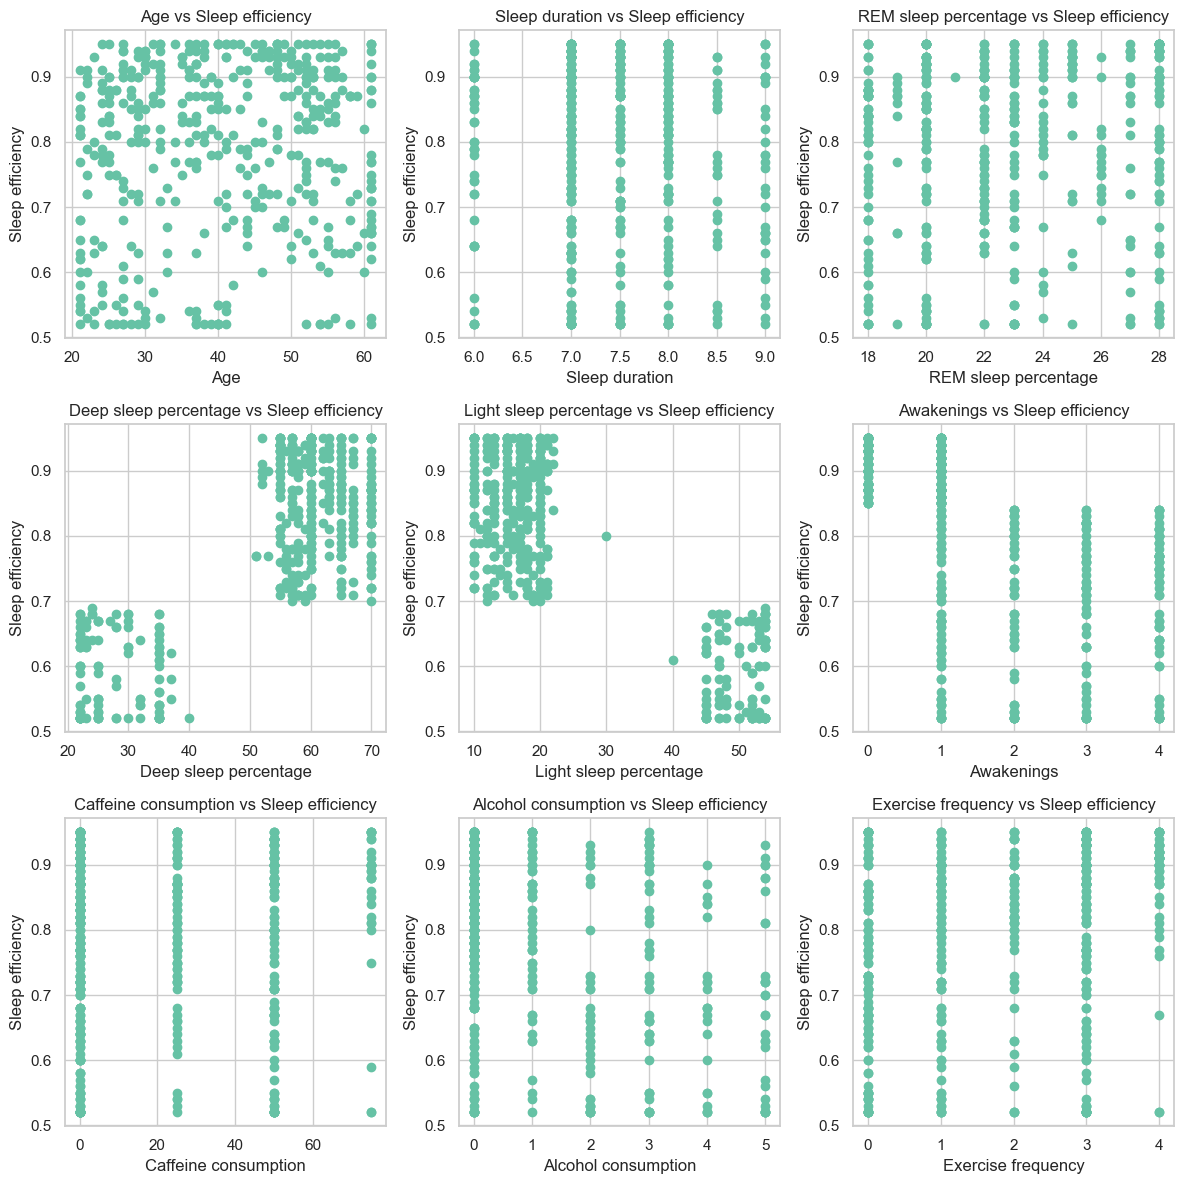

In [71]:
# Visualisation of relationship between numerical feature and target variable
numerical_feature = ['Age', 'Sleep duration', 'REM sleep percentage',
                      'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                      'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

target_variable = 'Sleep efficiency'

# Calculate the number of rows and columns for subplots
num_rows = len(numerical_feature) // 3 + (len(numerical_feature) % 3 > 0)
num_cols = min(len(numerical_feature), 3)

# Create subplots for numerical features
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# Iterate through the numerical features and create scatter plots
for i, feature in enumerate(numerical_feature):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(df[feature], df[target_variable])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target_variable)
    axes[row, col].set_title(f"{feature} vs {target_variable}")

# Remove empty subplots if any
if len(numerical_feature) % 3 != 0:
    for j in range(len(numerical_feature), num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

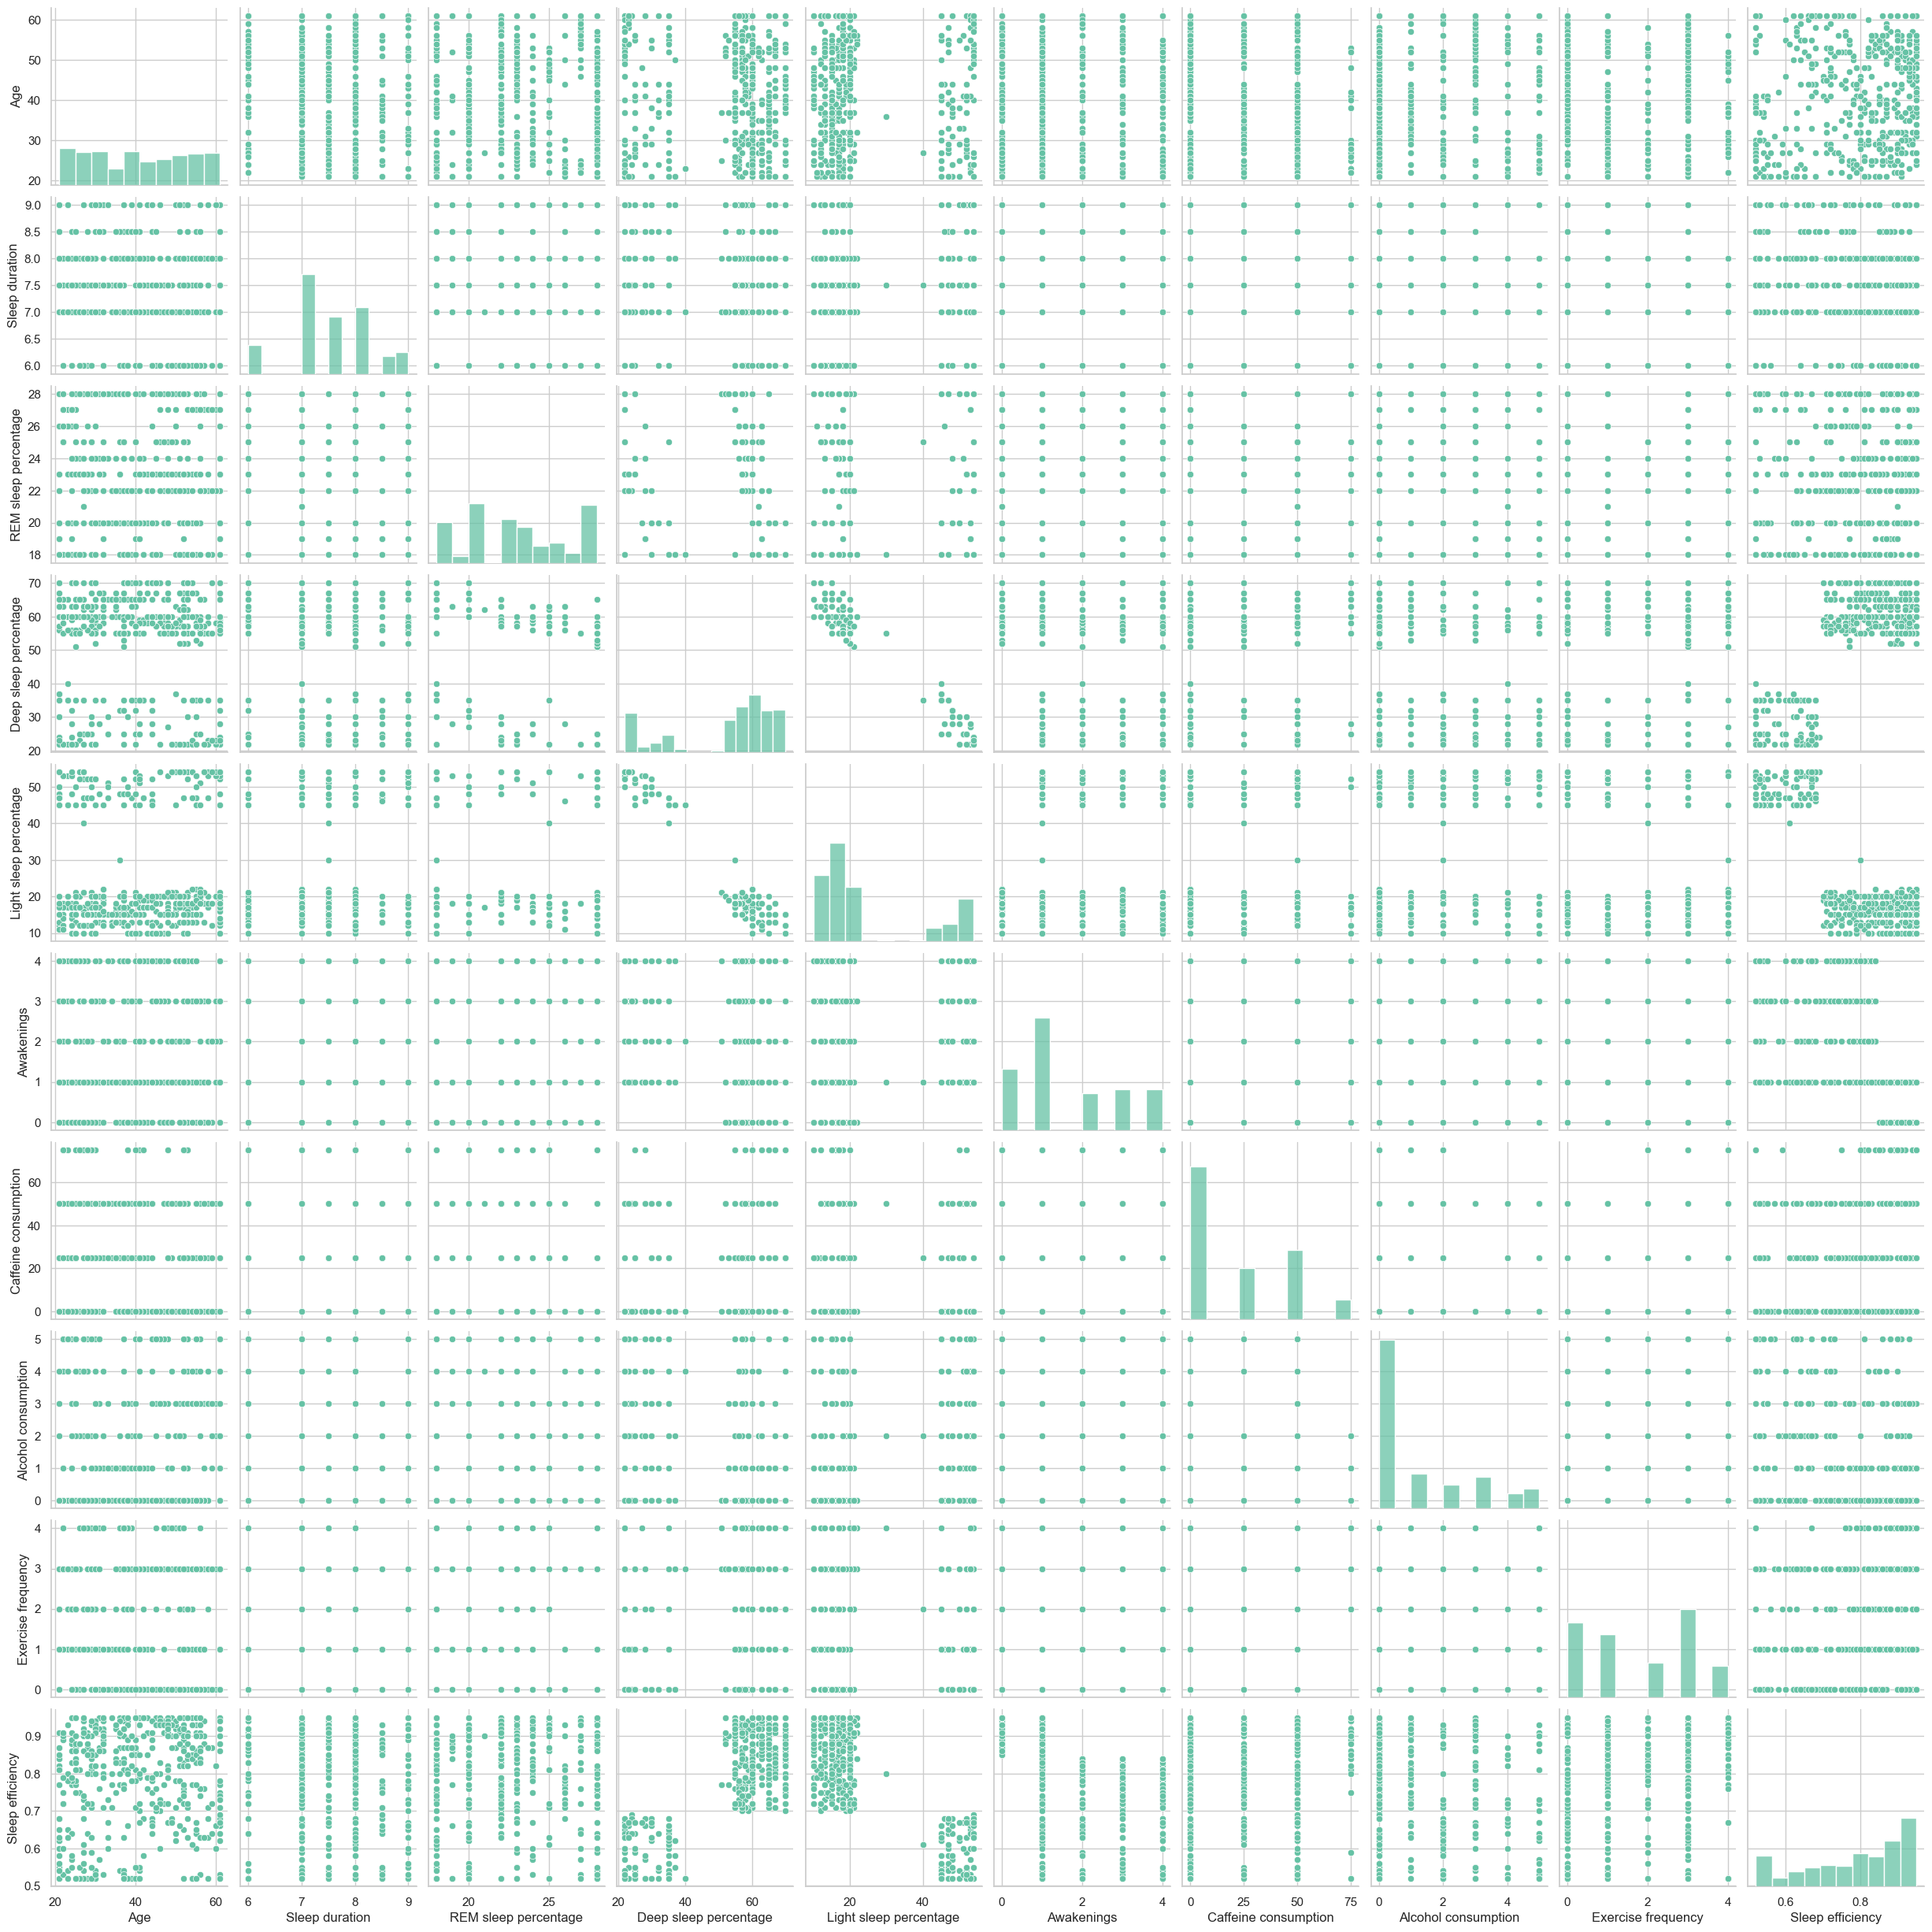

In [72]:
# Visualize numeric variables
sns.pairplot(df)
plt.show()

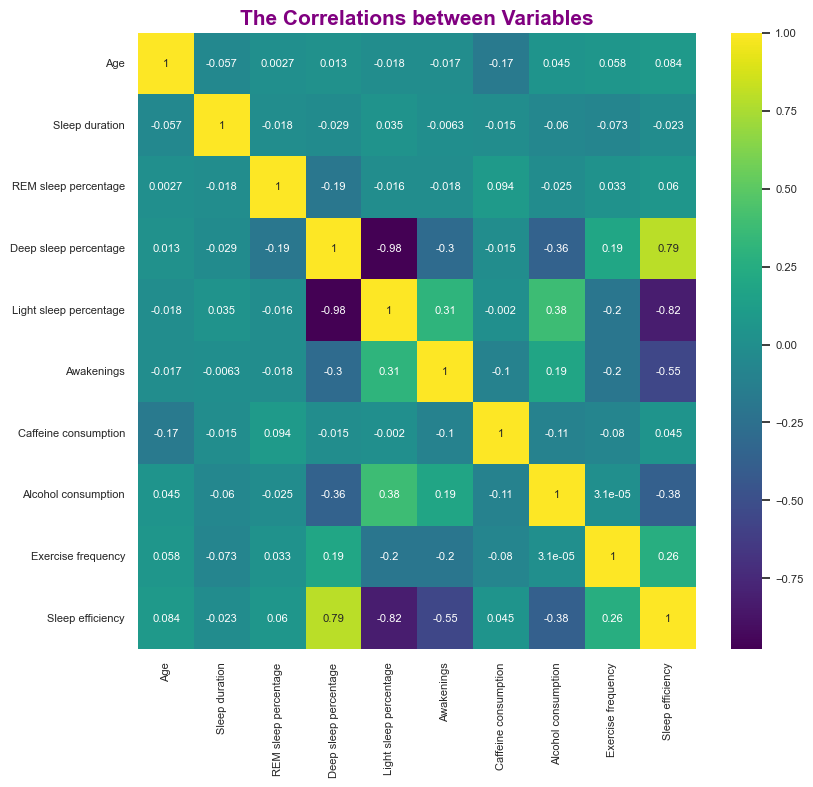

In [73]:
# Correlation Analysis: Analyze the relationships between numeric variables by calculating correlation coefficients.
plt.figure(figsize=(9, 8))
heatmap=sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=True,annot_kws={"fontsize": 8})
plt.title('The Correlations between Variables', size=15, color='purple', fontweight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
plt.show()

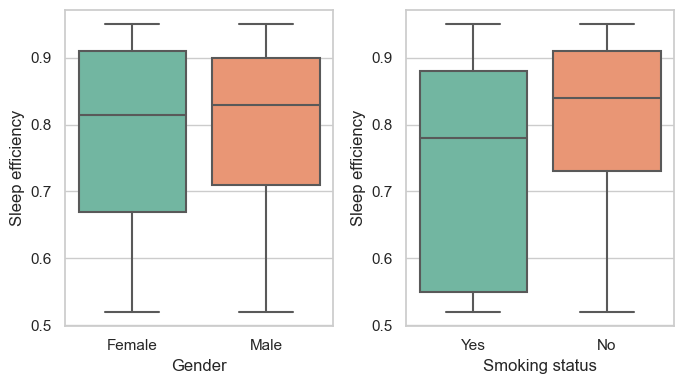

In [74]:
# Visualize categorical variables by using boxplot

# Create a list of all categorical variables
cat_vars = ['Gender', 'Smoking status']
fig, axes = plt.subplots(nrows=1, ncols=len(cat_vars), figsize=(7,4))

for i, var in enumerate(cat_vars):
    ax = axes[i]
    sns.boxplot(x=var, y='Sleep efficiency', data=df, ax=ax)

plt.tight_layout()
plt.show()

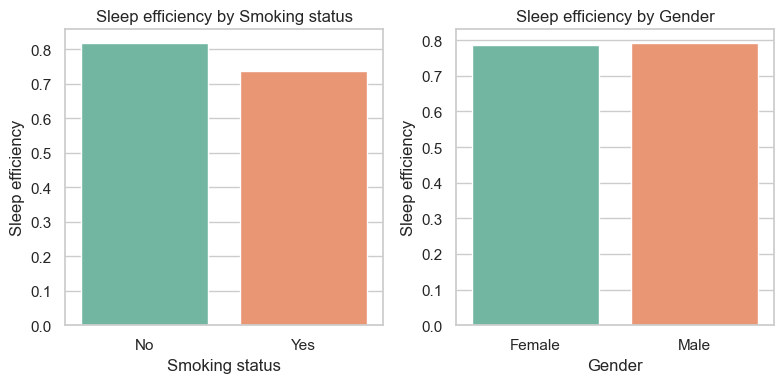

In [75]:
# Grouping and Aggregation: Group the data by categorical variables and compute aggregate statistics to visualise relationship
plt.figure(figsize=(8, 4))

# Grouped bar plot for Sleep efficiency by Smoking status
plt.subplot(1, 2, 1)
smoking_sleep_eff = df.groupby('Smoking status')['Sleep efficiency'].mean()
sns.barplot(x=smoking_sleep_eff.index, y=smoking_sleep_eff.values)
plt.xlabel('Smoking status')
plt.ylabel('Sleep efficiency')
plt.title('Sleep efficiency by Smoking status')

# Grouped bar plot for Sleep efficiency by Gender
plt.subplot(1, 2, 2)
gender_sleep_eff = df.groupby('Gender')['Sleep efficiency'].mean()
sns.barplot(x=gender_sleep_eff.index, y=gender_sleep_eff.values)
plt.xlabel('Gender')
plt.ylabel('Sleep efficiency')
plt.title('Sleep efficiency by Gender')

plt.tight_layout()
plt.show()

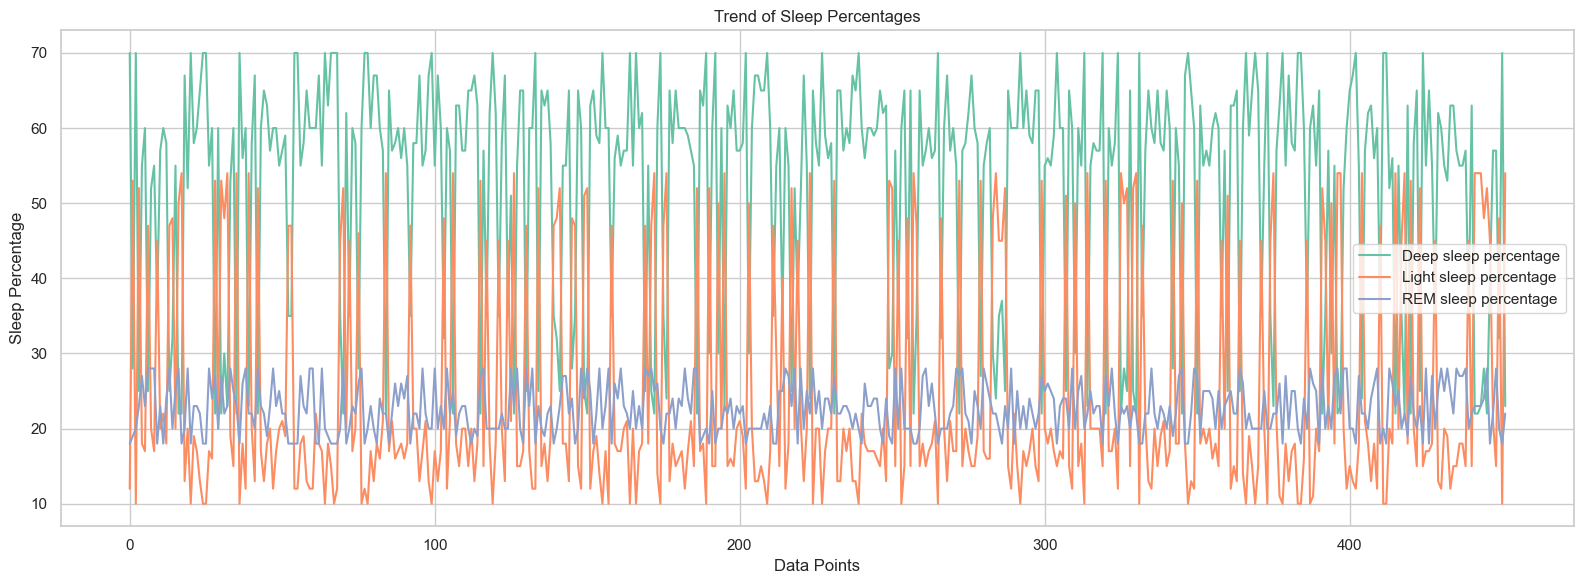

In [76]:
# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the trend graphs
ax.plot(df.index, df['Deep sleep percentage'], label='Deep sleep percentage')
ax.plot(df.index, df['Light sleep percentage'], label='Light sleep percentage')
ax.plot(df.index, df['REM sleep percentage'], label='REM sleep percentage')

# Set the labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Sleep Percentage')
ax.set_title('Trend of Sleep Percentages')

# Add a legend
ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

From the plot, we can observe the changes and variations in these sleep percentages over time. It provides an overview of the trends and patterns in the sleep data. For example, we can see if there are any noticeable increases or decreases in the sleep percentages across the data points
- REM sleep is a stage of sleep characterized by rapid eye movements, vivid dreaming, and heightened brain activity. During this stage, our brain becomes more active, and our eyes move rapidly. REM sleep is associated with cognitive processes, memory consolidation, and emotional regulation. It is also the stage where most of our dreaming occurs.

- Deep sleep is a stage of non-rapid eye movement (NREM) sleep, specifically stage 3. It is called "deep" sleep because it is the stage where our brain waves are the slowest and the amplitude of the waves is the highest. Deep sleep is essential for physical restoration, immune function, and overall well-being. It is associated with the release of growth hormone, cellular repair, and memory consolidation.

- Light sleep is the initial stage of NREM sleep, including stages 1 and 2. It is a transitional stage between wakefulness and deep sleep. During light sleep, our brain waves and muscle activity start to slow down. It is relatively easy to be awakened from light sleep, and we may experience fragmented thoughts or fleeting images. Light sleep plays a role in relaxation, preparing the body for deeper sleep stages, and maintaining a balanced sleep architecture.

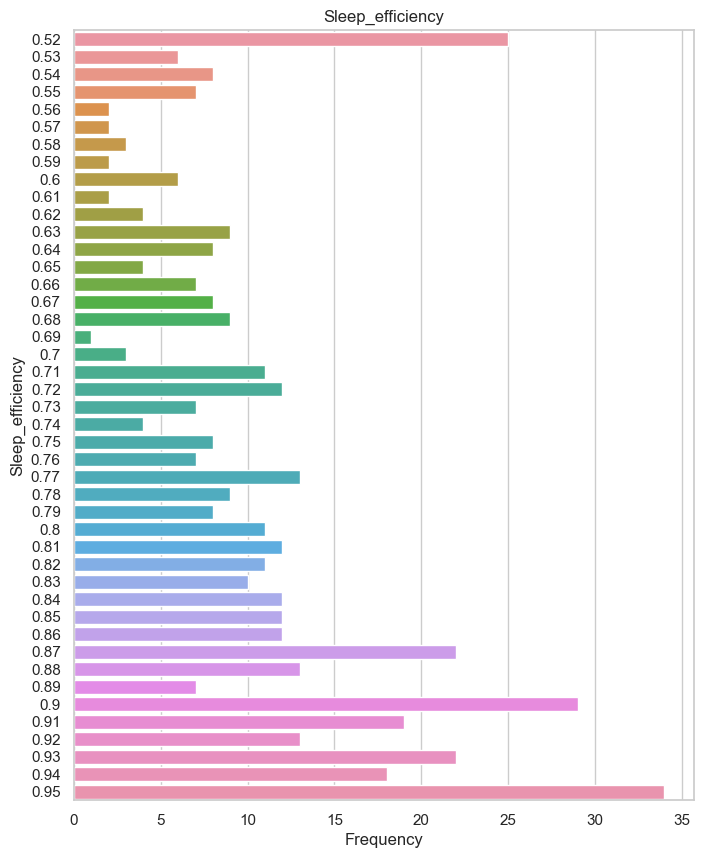

In [77]:
# Visualise the frequency of the target variable
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
ax = sns.countplot(y='Sleep efficiency', data=df)
plt.ylabel('Sleep_efficiency')
plt.xlabel('Frequency')
plt.title('Sleep_efficiency')
plt.show()

# Data Preprocessing

Handle Categorial Variable

In [78]:
# Change the values in the "Smoking status" column so that values that equal "Yes" are changed to 1 and values that equal "No" are changed to 0
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})

# Change the values in the "Gender" column so that values that equal "Male" are changed to 1 and values that equal "Female" are changed to 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


Data Normalisation with MinMaxScalar

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = df.drop(['Sleep efficiency'], axis=1)
y = df['Sleep efficiency']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Concatenate the normalized features with the target variable
normalized_data = pd.concat([normalized_df, y], axis=1)

# Checking whether if our features have been successfully normalized
normalized_data.head()



,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,1.000,0.0,0.000000,0.0,1.0000,0.045455,0.00,0.000000,0.0,1.0,0.75,0.88
1,1.000,1.0,0.333333,0.1,0.1250,0.977273,0.75,0.000000,0.6,1.0,0.75,0.66
2,0.475,0.0,0.666667,0.2,1.0000,0.000000,0.25,0.000000,0.0,0.0,0.75,0.89
3,0.475,0.0,0.000000,0.5,0.0625,0.954545,0.75,0.666667,1.0,1.0,0.25,0.52
4,0.900,1.0,0.666667,0.9,0.6875,0.181818,0.75,0.000000,0.6,0.0,0.75,0.76


# Model Developing - Different Regression Model 

Splitting into training set and testing set

In [80]:
# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=45)

Define Methods for training and evaluation

In [81]:

from sklearn.model_selection import cross_val_predict
def train_and_evaluate_regressor(regressor, regressor_name, X_train, y_train):
    # Define the performance metrics to evaluate
   
    # Train the regressor model
    regressor.fit(X_train, y_train)
    
    # Perform cross-validation on the training data
    y_pred_train = cross_val_predict(regressor, X_train, y_train, cv=5)
    
    # Visualize the predicted vs actual values for the validation data
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_train, y=y_pred_train)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual Values on Validation Set - {regressor_name}")
    plt.show()


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluation_matrices(regressor, regressor_name, X_train, y_train):
    # Perform cross-validation on the training data
    y_pred_train = cross_val_predict(regressor, X_train, y_train, cv=5)

    # Calculate performance metrics
    mse = mean_squared_error(y_train, y_pred_train)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, y_pred_train)
    r2 = r2_score(y_train, y_pred_train)

    # Create a dictionary to store the performance metrics
    performance_train = {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2
    }

    return performance_train

### Lasso Regressor

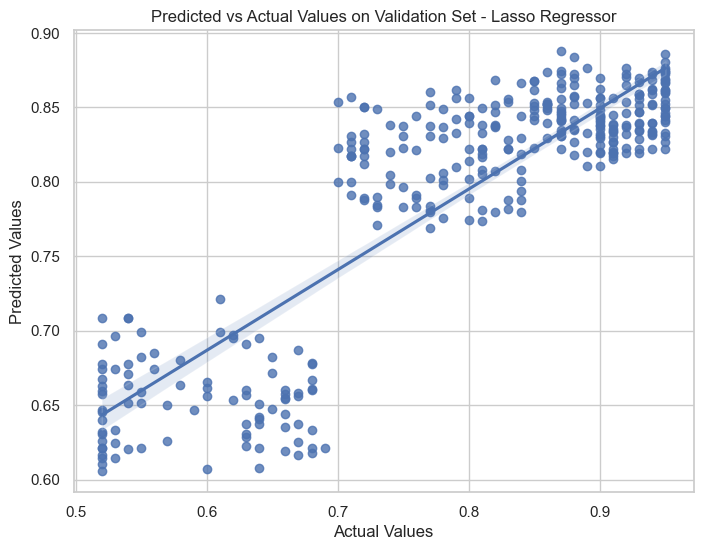

In [83]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regressor
regressor1 = Lasso(alpha=0.01)
train_and_evaluate_regressor(regressor1,"Lasso Regressor", X_train, y_train)

**Lasso regression** is a useful model for predicting sleep efficiency as it combines linear regression with regularization to enhance performance and feature selection. By applying a penalty to the absolute values of feature coefficients, lasso regression helps identify the most influential features for sleep efficiency prediction while disregarding less relevant ones. This approach reduces overfitting and provides insights into the factors that have a significant impact on sleep efficiency. By leveraging lasso regression, we can develop more accurate models to understand and predict sleep efficiency.

### Decision Tree Regressor

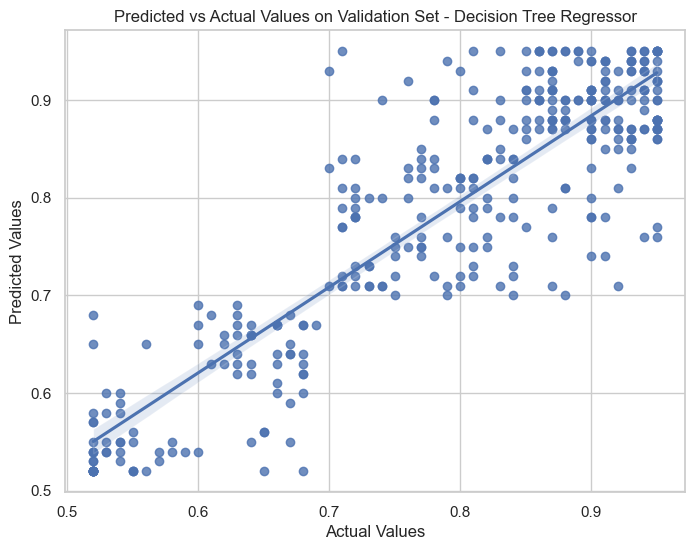

In [84]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the Decision Tree regressor
regressor2 = DecisionTreeRegressor()
train_and_evaluate_regressor(regressor2,"Decision Tree Regressor" ,X_train, y_train)


**Decision tree regressor** is a powerful algorithm for predicting sleep efficiency as it uses a tree-like model to analyze the data and make predictions. It recursively splits the data based on different features and creates decision rules that partition the data into subsets with similar sleep efficiency values. This enables the algorithm to capture complex non-linear relationships between the features and the target variable. Decision tree regressor can handle both numerical and categorical features, making it suitable for sleep efficiency prediction where various factors, such as age, sleep duration, and stress levels, may influence sleep quality. It provides interpretable results by visualizing the decision tree, allowing us to understand the decision-making process and identify the most influential features for sleep efficiency.

Random Forest Regressor

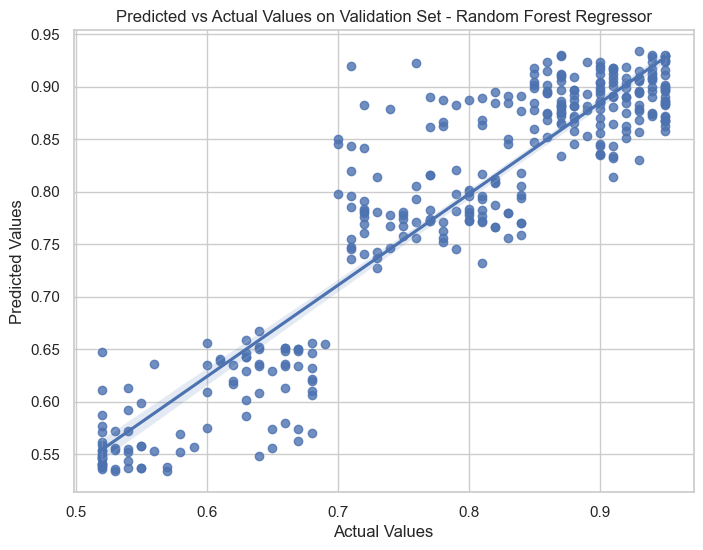

In [85]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the RandomForestRegressor
regressor3 = RandomForestRegressor()
train_and_evaluate_regressor(regressor3,'Random Forest Regressor', X_train, y_train)

**Random forest regressor** is a powerful ensemble learning algorithm that combines multiple decision trees to predict sleep efficiency. It works by creating a multitude of decision trees on different subsets of the data and then averaging the predictions of these individual trees to obtain the final prediction. This ensemble approach helps to reduce overfitting and improve the accuracy and generalization of the model. Random forest regressor can handle both numerical and categorical features and automatically handles feature selection and feature importance estimation. It captures complex relationships and interactions between features, making it effective for predicting sleep efficiency, which is influenced by various factors. By aggregating the predictions of multiple trees, random forest regressor provides robust and reliable sleep efficiency predictions.

### XGB Regressor

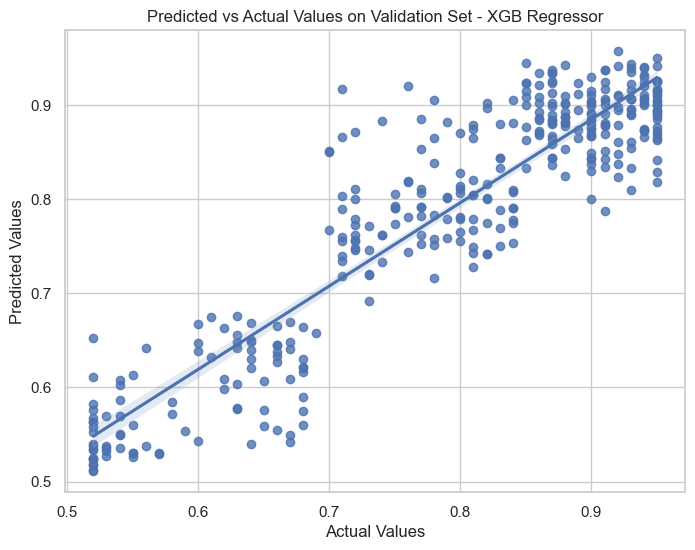

In [86]:
from xgboost import XGBRegressor

# Initialize the XGBoostRegressor
regressor4 = XGBRegressor()
train_and_evaluate_regressor(regressor4,'XGB Regressor',X_train, y_train)

**XGBRegressor**, short for Extreme Gradient Boosting Regressor, is an advanced gradient boosting algorithm that uses an ensemble of decision trees to predict sleep efficiency. It is based on the gradient boosting framework and has gained popularity for its high predictive performance and efficiency. XGBRegressor builds an ensemble of weak prediction models, called decision trees, in a sequential manner. It uses gradient descent optimization to minimize the loss function and improve the model's accuracy. XGBRegressor handles missing values, supports both numerical and categorical features, and can automatically handle feature selection. It also provides built-in regularization techniques to prevent overfitting and improve generalization. XGBRegressor is known for its speed, scalability, and ability to capture complex relationships in the data. With its robustness and accuracy, XGBRegressor can effectively predict sleep efficiency.

### KNeighbors Regressor

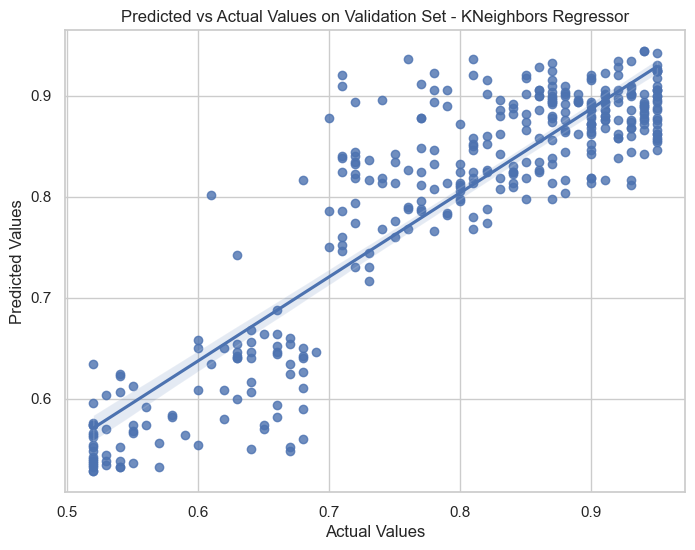

In [87]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor
regressor5 = KNeighborsRegressor()
train_and_evaluate_regressor(regressor5,'KNeighbors Regressor', X_train, y_train)

**KNeighborsRegressor** is a supervised learning algorithm used for regression tasks. It is based on the concept of k-nearest neighbors, where the prediction for a new data point is determined by the average or weighted average of the target values of its k nearest neighbors in the training dataset. In the case of KNeighborsRegressor, the algorithm calculates the distance between the new data point and all other data points in the training set. It then selects the k nearest neighbors based on the distance metric and uses their target values to make predictions. KNeighborsRegressor is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution. It can capture complex relationships and is particularly useful when the data has nonlinear patterns. KNeighborsRegressor can be applied to predict sleep efficiency by considering the features that influence sleep quality and finding the k nearest neighbors based on those features to estimate the sleep efficiency of a new data point.

### Visualise evaluation matrices of all model to choose the best model for tuning

In [88]:
# Define the performance metrics to evaluate
regressors = {
    "Lasso Regression": regressor1,
    "Decision Tree Regression": regressor2,
    "Random Forest Regression": regressor3,
    "XGBoost Regression": regressor4,
    "K-Nearest Neighbors Regression": regressor5
}

# Create an empty dictionary to store the performance metrics for each regressor
performance_metrics = {}

# Evaluate and collect performance metrics for each regressor
for regressor_name, regressor in regressors.items():
    # Train and evaluate the regressor
    performance_train = evaluation_matrices(regressor, regressor_name, X_train, y_train)
    
    # Store the performance metrics for the regressor
    performance_metrics[regressor_name] = performance_train

# Create the evaluation table using pd.DataFrame
evaluation_table = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Print the evaluation table
print("\nEvaluation Metrics Table:")
evaluation_table



Evaluation Metrics Table:


,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
Lasso Regression,0.005471,0.073968,0.061485,0.695065
Decision Tree Regression,0.004161,0.064510,0.047839,0.768063
Random Forest Regression,0.002445,0.049450,0.038085,0.863716
XGBoost Regression,0.002846,0.053347,0.041374,0.841388
K-Nearest Neighbors Regression,0.003499,0.059152,0.045463,0.804991


Among the models evaluated, Random Forest shows the best performance based on the provided metrics. The evaluation metrics used are Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R^2 Score.

Random Forest has the lowest values for MSE, RMSE, and MAE, indicating that it has the smallest average difference between the predicted sleep efficiency values and the actual values. This implies that Random Forest achieves better accuracy in predicting sleep efficiency compared to the other models.

Additionally, Random Forest has the highest R^2 Score, which measures the proportion of variance in the target variable (sleep efficiency) that can be explained by the model. A higher R^2 Score indicates a better fit to the data. In this case, Random Forest achieves an R^2 Score of 0.863716, suggesting that it explains approximately 86.4% of the variance in sleep efficiency.

Thus, We have chosen the Random Forest model to perform hyperparameter tuning since it is the best performing model among the models used.

# Hyperparameter tuning

### Perform hyperparameter tuning on Random Forest Regressor model by using GridSearchCv

In [89]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

metrics = {
    'Mean Squared Error': mean_squared_error,
    'Root Mean Squared Error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score
}

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Train the Random Forest model with the best parameters
best_regressor = RandomForestRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_train_rf_tuned = best_regressor.predict(X_train)

# Compute performance metrics on the training data
performance_train_rf_tuned = {}
for metric_name, metric_func in metrics.items():
    performance_train_rf_tuned[metric_name] = metric_func(y_train, y_pred_train_rf_tuned)

# Print the results
print("Tuned Random Forest Regression")
for metric_name, metric_value in performance_train_rf_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))



Tuned Random Forest Regression
Mean Squared Error: 0.00042
Root Mean Squared Error: 0.02053
Mean Absolute Error: 0.01566
R^2 Score: 0.97651


In [90]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:")
for param_name, param_value in best_params.items():
    print("{}: {}".format(param_name, param_value))

Best Hyperparameters:
bootstrap: True
max_depth: 10
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200


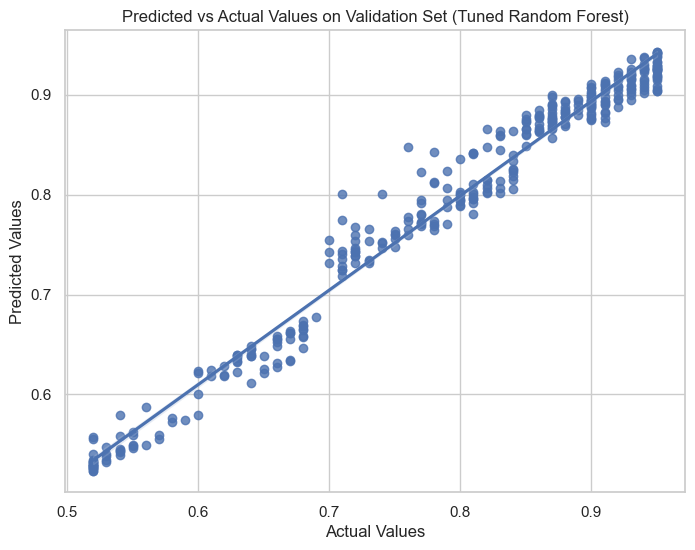

In [91]:
# Visualize the predicted vs actual values for the validation data
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train_rf_tuned)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Validation Set (Tuned Random Forest)")
plt.show()

# Evaluate on testing set

Evaluate using the best tuned model on the testing set to make prediction.

In [92]:
# Make predictions on the testing set using the tuned Random Forest model
y_pred_test_rf_tuned = best_regressor.predict(X_test)

# Compute performance metrics on the testing data
performance_test_rf_tuned = {}
for metric_name, metric_func in metrics.items():
    performance_test_rf_tuned[metric_name] = metric_func(y_test, y_pred_test_rf_tuned)

# Print the results
print("Tuned Random Forest Regression - Testing Set")
for metric_name, metric_value in performance_test_rf_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))

Tuned Random Forest Regression - Testing Set
Mean Squared Error: 0.00221
Root Mean Squared Error: 0.04696
Mean Absolute Error: 0.03632
R^2 Score: 0.87065


The tuned Random Forest Regression model demonstrates excellent performance on the testing set for predicting sleep efficiency. The model achieves a low mean squared error of 0.00211, indicating that it accurately predicts sleep efficiency values with minimal error. The root mean squared error of 0.04534 further supports this, as it represents the standard deviation of the residuals and reflects the model's overall prediction accuracy.

Additionally, the mean absolute error of 0.03632 suggests that, on average, the model's predictions deviate by 0.03632 units from the actual sleep efficiency values. This indicates a relatively small average prediction error. Moreover, the R^2 score of 0.87065 indicates that the model explains 87.94% of the variability in the sleep efficiency data, which is a good level of predictive power.

Overall, the tuned Random Forest Regression model demonstrates strong performance on the testing set for predicting sleep efficiency. Its low error metrics and high R^2 score indicate accurate and reliable predictions of sleep efficiency values.

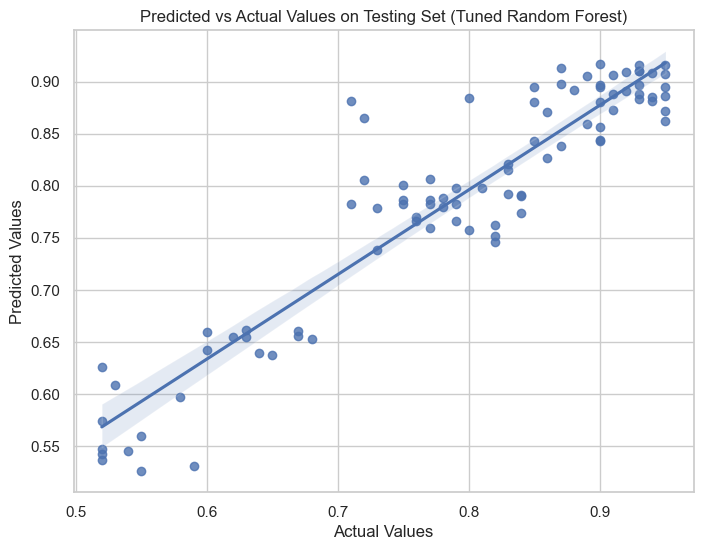

In [93]:
# Visualize the predicted vs actual values for the testing data
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test_rf_tuned)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Testing Set (Tuned Random Forest)")
plt.show()

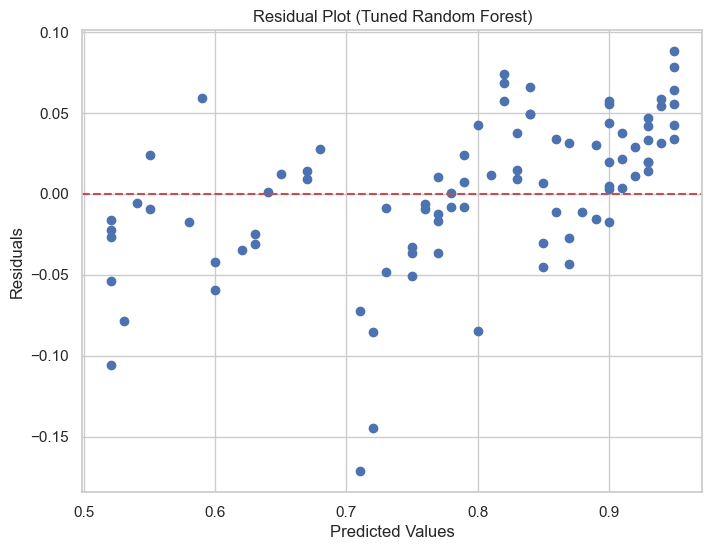

In [94]:
# Calculate residuals
residuals = y_test - y_pred_test_rf_tuned

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Tuned Random Forest)")
plt.show()

Residuals are the discrepancies between the actual values of the target variable and the predicted values obtained from the regression model. The bar chart shows normal distribution and scatter plot shows value concentrated at zero means that the predicted values is close to the actual values. This proof that random forest model is the best model apply to this problem

Visualise feature importancy

Feature Importances:
                   Feature  Importance
0    Deep sleep percentage    0.562605
1   Light sleep percentage    0.190534
2               Awakenings    0.120978
3                      Age    0.031700
4           Smoking status    0.024797
5      Alcohol consumption    0.019906
6           Sleep duration    0.016776
7     REM sleep percentage    0.013599
8       Exercise frequency    0.011828
9     Caffeine consumption    0.004861
10                  Gender    0.002416


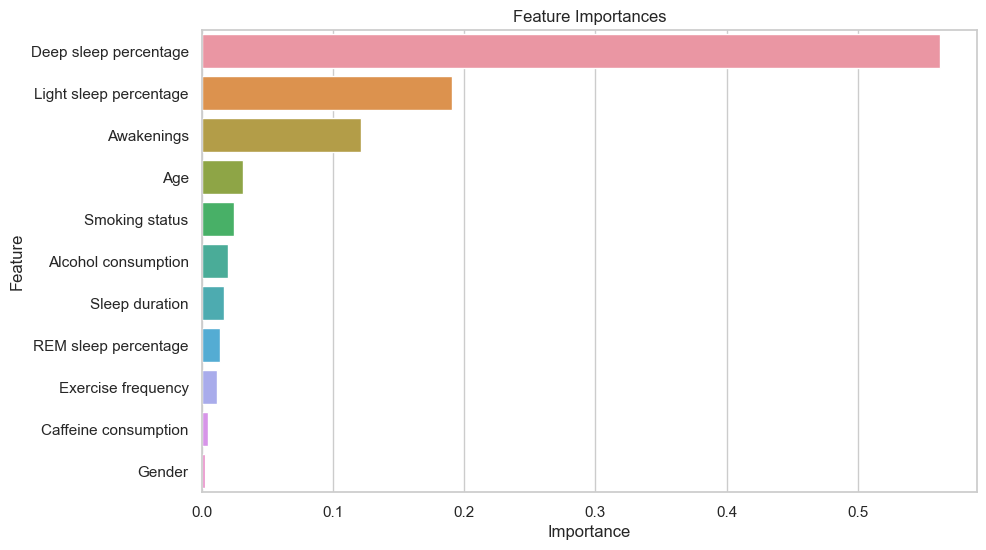

In [95]:
# Get feature importances from the tuned Random Forest model
importances = best_regressor.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': normalized_df.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Feature importances indicate the relative importance of each feature in predicting the target variable, in this case, sleep efficiency. The feature importances can help us understand which features have the most significant impact on the model's predictions by this case is Deep Sleep Percentage. By examining the importance values, we can identify the key factors that contribute the most to predicting sleep efficiency. This information is valuable for feature selection, as it allows us to prioritize and focus on the most influential features when building future models or making data-driven decisions.

Save the best tuned model using joblit

In [103]:
import joblib

# Assuming your trained model is stored in the variable 'best_regressor'
try:
    joblib.dump(best_regressor, 'best_sleepefficiency_model.pkl')
    print("Model saved successfully.")
except Exception as e:
    print("Error occurred while saving the model:", str(e))



Model saved successfully.
